In [ ]:
#import standart library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#membuat file drug200.csv pertama dari dataframe
dataframe = pd.read_csv('/drug200.csv') 

#meanampilkan 5 baris pertama dari dataframe
dataframe.head()

# print(d.head)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [1]:
#import LabelEndcore dari module sklearn
from sklearn.preprocessing import LabelEncoder

#menyalin  atau copy dataframe agar dataframe awal tetap utuh
dataframe_int = dataframe.copy()

#membuat objek/ instance yang bernama encoder
encoder = LabelEncoder() 

#Membuat list dari nama kolom data kategori
categorial_data = ['Sex','BP','Cholesterol','Drug']

#mengubah setiap data kategori menjadi numerik dengan encoder
for kolom in categorial_data:
  dataframe_int[kolom]=encoder.fit_transform(dataframe[kolom])
#sekarang data sudah berupa angka sepemuhnya
dataframe_int.head()



NameError: ignored

In [ ]:

for kolom in categorial_data:
  print(kolom,dataframe_int[kolom].unique())

Sex [0 1]
BP [0 1 2]
Cholesterol [0 1]
Drug [0 3 4 1 2]


In [ ]:
for kolom in categorial_data:
  print(kolom,dataframe[kolom].unique())

In [ ]:
#Menampilkan matrix korelasi antar kolom
dataframe_int.corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,0.041856
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,0.018239
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.419397
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.048415
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,-0.689051
Drug,0.041856,0.018239,0.419397,0.048415,-0.689051,1.000000


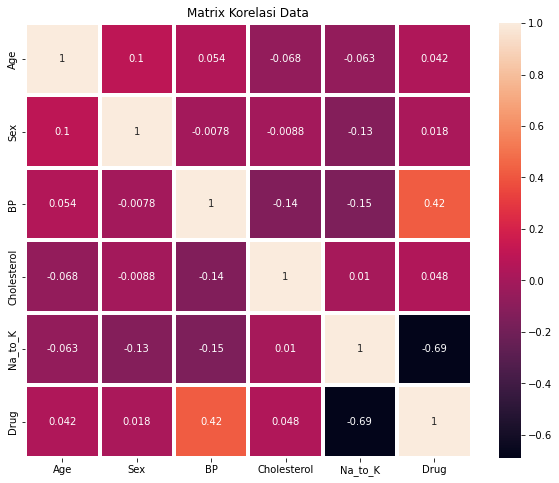

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Matrix Korelasi Data')
sns.heatmap(dataframe_int.corr(),annot=True,linewidths=3)
plt.show()

In [ ]:
def distribusi():
    fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(12,8))
    plt.suptitle('DISTRIBUSI',fontsize=20)
    
    def kolom_generator():
        for kolom in dataframe_int:
            yield kolom
    kolom = kolom_generator()

    for i in range(0,2):
        for j in range(0,3):
            k = next(kolom)
            dataframe_int[k].plot(kind='hist',ax=axes[i,j])
            axes[i,j].set_title(k)
    plt.show()

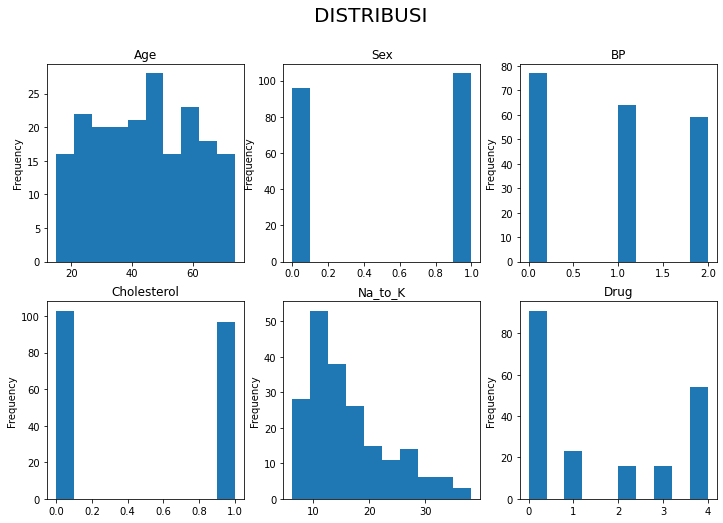

In [ ]:
distribusi()

In [ ]:
# Memisahkan dataframe awal menjadi data dan label
data = dataframe_int.drop('Drug',axis=1)
label = dataframe_int['Drug']

# Memisahkan dataframe menjadi data latihan dan data tes
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,label,test_size=0.2)

# Print dataframe.shape untuk mengetahui bentuk dataframe
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

In [ ]:
#Import linear SVC model dari sklern
from sklearn.svm import SVC

In [ ]:
#membuat objek dengan nama "model" dengan memanggil SVC()
model = SVC(gamma='scale')

In [ ]:
dataframe.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

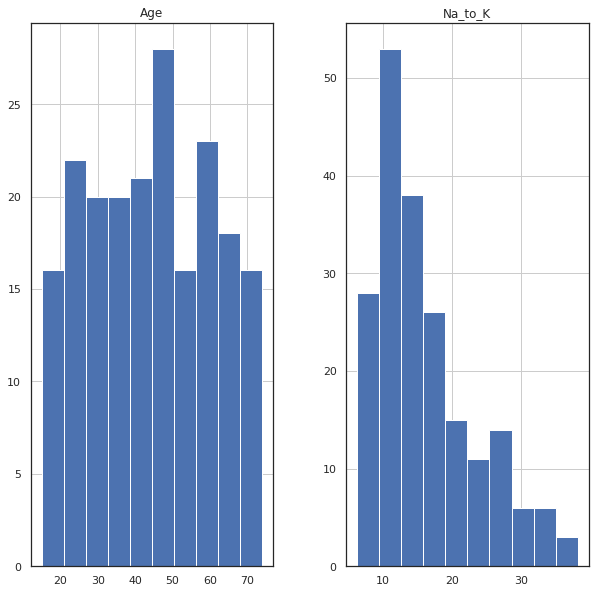

In [ ]:
sns.set(style = 'white', rc = {'figure.figsize' : (10, 10)})
ax = dataframe.hist()

In [ ]:
# def cat_col_gen(list_col):
#   for col in list_col:
#     yield col

# # col_obj = cat_col_gen(cat_col)

# sns.set(font_scale=2)
# fig, ax = plt.subplots(4, 4, figsize=(40, 40))
# for i in range(0, 4):
#   for j in range(0, 4):
#     # col = next(col_obj)
#     p = sns.countplot(data=dataframe[cat_col], x=col, ax=ax[i][j])
#     p.set_xticklabels(p.get_xticklabels(), rotation=90)

#     if i==3 and j==0:
#       break

# fig.tight_layout()
# plt.show()